# Prediksi Popularitas Lagu dengan Machine Learning

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:

# Load dataset
file_path = "songs_normalize.csv"
df = pd.read_csv(file_path)

# Tampilkan 5 data pertama
df.head()


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


## Pra-pemrosesan Data
- Menghapus kolom yang tidak relevan
- Memisahkan fitur (X) dan target (y)
- Normalisasi fitur numerik
- Membagi dataset menjadi training dan testing

In [4]:

# Delete irrelevant columns
df = df.drop(columns=['artist', 'song', 'genre'])

# Separating features and targets
X = df.drop(columns=['popularity'])
y = df['popularity']

# Normalization of numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Show data shape
X_train.shape, X_test.shape


((1600, 14), (400, 14))

## Pelatihan Model
Menggunakan Random Forest Regressor untuk memprediksi popularitas lagu.

In [5]:

# Inisialisasi model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training model
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')


MAE: 15.32
RMSE: 22.04


## Visualisasi Hasil
Distribusi error dan hubungan prediksi vs nilai aktual.

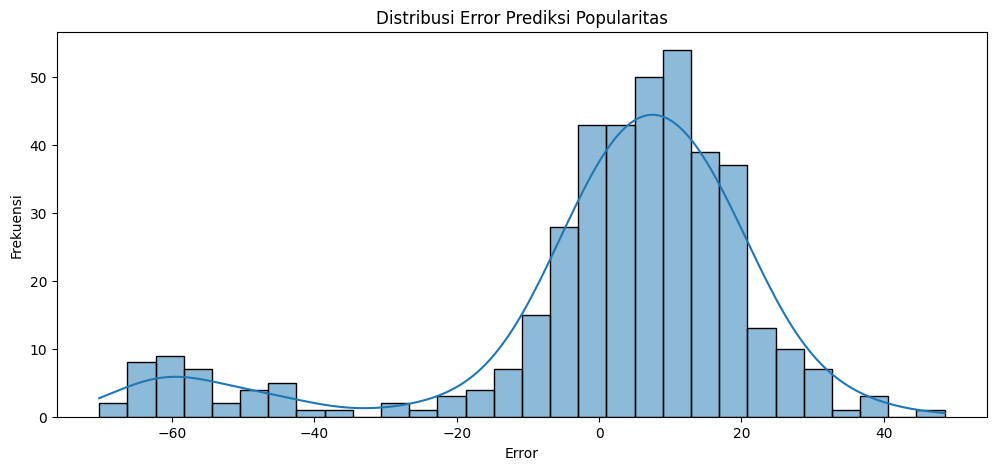

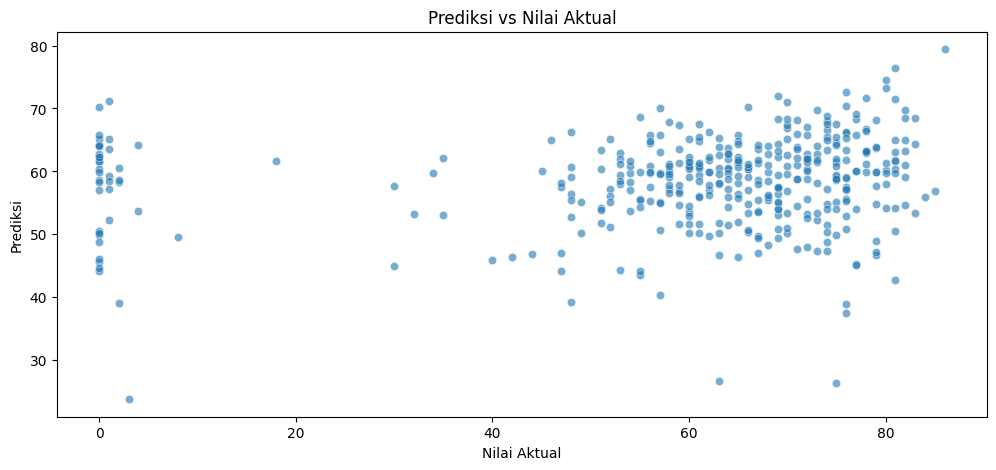

In [6]:

# Plot distribusi error
errors = y_test - y_pred

plt.figure(figsize=(12, 5))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Error")
plt.ylabel("Frekuensi")
plt.title("Distribusi Error Prediksi Popularitas")
plt.show()

# Plot Prediksi vs Aktual
plt.figure(figsize=(12, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi")
plt.title("Prediksi vs Nilai Aktual")
plt.show()
